# Aprendizado não supervisionado | Consórcio

In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random

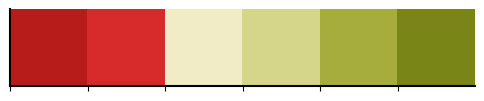

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

'''<<Personalization.>>'''

# graph personalization 
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["axes.facecolor"] ="white"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams["font.family"] = "monospace";

#color pallet and theme
import matplotlib.colors

colors = ["#B71C1B","#D72A2B","#F2ECC6","#D5D68A","#A6AD3C","#798517"]
colors2 = ["#F2ECC6","#D5D68A","#A6AD3C","#798517","#D72A2B"]
cmap = matplotlib.colors.ListedColormap(colors2)

sns.palplot(sns.color_palette(colors))

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import pandas_profiling 
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import train_test_split # train, test split
from sklearn.preprocessing import StandardScaler # normalization
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.svm import SVC # SVC model
from xgboost import XGBClassifier # XGBoost model
from sklearn.model_selection import GridSearchCV, cross_val_score # Gridsearch 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve# results
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer


# #01 - Carregando os dados e analisando

In [4]:
# Inicializa o Faker para geração de dados fictícios com localização do Brasil
fake = Faker('pt_BR')

# Define o número de linhas de dados a serem geradas
num_rows = 1000

# Cria um DataFrame vazio para armazenar os dados
data = pd.DataFrame()

# Gera dados sintéticos para cada variável
data['ID_DOCUMENTO'] = range(1, num_rows + 1)
data['ID_COTA'] = range(1001, 1001 + num_rows)
data['DT_CONTEM'] = [fake.date_between(start_date='-5y', end_date='today') for _ in range(num_rows)]
data['CANAL_PREFERENCIAL'] = [random.choice(['Telefone', 'Email', 'SMS', 'Correio']) for _ in range(num_rows)]
data['PERFIL_FAGC'] = [random.choice(['Sim', 'Não']) for _ in range(num_rows)]
data['PROPENSAO_ABANDONO'] = np.random.uniform(0, 1, num_rows)
data['VALOR_SALDO_MEDIO'] = np.random.uniform(1000, 10000, num_rows)
data['GRP_PERSONAS'] = [random.choice(['Grupo A', 'Grupo B', 'Grupo C']) for _ in range(num_rows)]
data['RENTABILIDADE'] = np.random.uniform(0, 10, num_rows)
data['IDHM'] = np.random.uniform(0.5, 1, num_rows)
data['GRAU_CONHECIMENTO'] = [random.choice(['Baixo', 'Médio', 'Alto']) for _ in range(num_rows)]
data['PERFIL_DIGITAL'] = [random.choice(['Básico', 'Intermediário', 'Avançado']) for _ in range(num_rows)]
data['RENDA'] = np.random.uniform(1000, 10000, num_rows)
data['CPV'] = [random.choice(['Muito Alto', 'Alto', 'Baixo', 'Muito Baixo']) for _ in range(num_rows)]
data['DT_NASCIMENTO'] = [fake.date_of_birth(minimum_age=18, maximum_age=90) for _ in range(num_rows)]
data['IDADE_CLIENTE'] = np.random.randint(18, 90, num_rows)
data['RELACIONAMENTO_PRIORI'] = [random.choice(['Sim', 'Não']) for _ in range(num_rows)]
data['DT_RELAC_INICIO'] = [fake.date_between(start_date='-10y', end_date='-1y') for _ in range(num_rows)]
data['SEXO'] = [random.choice(['Masculino', 'Feminino']) for _ in range(num_rows)]
data['CPF'] = [fake.unique.random_number(digits=11) for _ in range(num_rows)]
data['SEGMENTO'] = [random.choice(['Classic', 'Exclusive', 'Prime', 'Private', 'Corporate']) for _ in range(num_rows)]
data['PROCESSO'] = [random.choice(['Sim', 'Não']) for _ in range(num_rows)]
data['CIDADE'] = [fake.city() for _ in range(num_rows)]
data['ESTADO'] = [fake.state_abbr() for _ in range(num_rows)]
data['DT_VENDA'] = [fake.date_between(start_date='-1y', end_date='today') for _ in range(num_rows)]
data['VL_TAXA'] = np.random.uniform(50, 200, num_rows)
data['VL_SEGURO'] = np.random.uniform(100, 500, num_rows)
data['PZ_PARCELAS'] = np.random.randint(12, 60, num_rows)
data['N_ASSEMBLEIAS'] = np.random.randint(1, 12, num_rows)
data['VL_PARCELA'] = np.random.uniform(50, 500, num_rows)
data['N_PC_PAGAS'] = np.random.randint(0, data['PZ_PARCELAS'], num_rows)
data['DS_FORMA_PAGAMENTO'] = [random.choice(['Boleto', 'Débito Automático', 'Transferência Bancária']) for _ in range(num_rows)]
data['NM_PONTO_VENDA'] = [random.choice(['Agência', 'Mobile', 'Correspondente', 'Internet Banking']) for _ in range(num_rows)]
data['ST_CONTEMPLADO'] = [random.choice(['S', 'L', 'N']) for _ in range(num_rows)]

# Adiciona a coluna de data de cancelamento
data['DT_CANCELAMENTO'] = [fake.date_between(start_date=data.loc[i, 'DT_VENDA'], end_date='today') if data.loc[i, 'ST_CONTEMPLADO'] == 'N' else np.nan for i in range(num_rows)]


In [5]:
data.head().style.background_gradient()

,ID_DOCUMENTO,ID_COTA,DT_CONTEM,CANAL_PREFERENCIAL,PERFIL_FAGC,PROPENSAO_ABANDONO,VALOR_SALDO_MEDIO,GRP_PERSONAS,RENTABILIDADE,IDHM,GRAU_CONHECIMENTO,PERFIL_DIGITAL,RENDA,CPV,DT_NASCIMENTO,IDADE_CLIENTE,RELACIONAMENTO_PRIORI,DT_RELAC_INICIO,SEXO,CPF,SEGMENTO,PROCESSO,CIDADE,ESTADO,DT_VENDA,VL_TAXA,VL_SEGURO,PZ_PARCELAS,N_ASSEMBLEIAS,VL_PARCELA,N_PC_PAGAS,DS_FORMA_PAGAMENTO,NM_PONTO_VENDA,ST_CONTEMPLADO,DT_CANCELAMENTO
0,1,1001,2023-06-23,Correio,Sim,0.250566,9481.073246,Grupo A,7.358016,0.900613,Médio,Básico,1993.164666,Muito Alto,1954-12-29,69,Sim,2021-04-27,Masculino,32248400289,Prime,Sim,da Mata da Serra,AP,2023-08-03,143.043348,370.144304,17,2,195.252325,2,Débito Automático,Mobile,N,2023-09-29
1,2,1002,2020-12-17,Correio,Sim,0.353149,7768.551039,Grupo B,1.924547,0.982635,Baixo,Básico,7780.716141,Alto,1989-02-27,80,Não,2017-11-28,Masculino,57361666396,Classic,Sim,Rocha Alegre,PA,2023-12-22,137.284514,210.482453,25,2,151.805855,14,Transferência Bancária,Internet Banking,S,nan
2,3,1003,2023-10-11,Telefone,Sim,0.746007,5984.868155,Grupo C,9.105461,0.851639,Alto,Básico,9774.666170,Baixo,2000-03-23,50,Sim,2020-06-22,Masculino,76138993646,Corporate,Não,Lima,ES,2023-10-29,196.349278,265.159057,43,2,69.246607,8,Boleto,Agência,N,2024-03-28
3,4,1004,2024-03-02,SMS,Não,0.532970,9519.233613,Grupo C,5.203811,0.750609,Alto,Intermediário,5637.398605,Baixo,1968-06-14,80,Sim,2015-07-17,Feminino,14166294352,Corporate,Não,Oliveira,ES,2023-08-04,52.852188,317.189842,16,5,51.214495,8,Transferência Bancária,Mobile,N,2023-08-07
4,5,1005,2023-09-16,Correio,Sim,0.281411,5323.282292,Grupo C,8.935675,0.930508,Baixo,Avançado,7210.521993,Muito Alto,1940-12-03,85,Sim,2015-10-21,Feminino,99554315030,Prime,Sim,da Rocha da Praia,AC,2024-02-10,177.684027,258.571360,36,3,366.659730,4,Transferência Bancária,Agência,N,2024-03-29


In [6]:
df = data.copy()

In [7]:
df.shape

(1000, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_DOCUMENTO           1000 non-null   int64  
 1   ID_COTA                1000 non-null   int64  
 2   DT_CONTEM              1000 non-null   object 
 3   CANAL_PREFERENCIAL     1000 non-null   object 
 4   PERFIL_FAGC            1000 non-null   object 
 5   PROPENSAO_ABANDONO     1000 non-null   float64
 6   VALOR_SALDO_MEDIO      1000 non-null   float64
 7   GRP_PERSONAS           1000 non-null   object 
 8   RENTABILIDADE          1000 non-null   float64
 9   IDHM                   1000 non-null   float64
 10  GRAU_CONHECIMENTO      1000 non-null   object 
 11  PERFIL_DIGITAL         1000 non-null   object 
 12  RENDA                  1000 non-null   float64
 13  CPV                    1000 non-null   object 
 14  DT_NASCIMENTO          1000 non-null   object 
 15  IDADE

In [9]:
# Analise das variaveis quantitativas usando a função describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_DOCUMENTO,1000.0,5.005000e+02,2.888194e+02,1.000000e+00,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
ID_COTA,1000.0,1.500500e+03,2.888194e+02,1.001000e+03,1.250750e+03,1.500500e+03,1.750250e+03,2.000000e+03
PROPENSAO_ABANDONO,1000.0,4.905137e-01,2.834944e-01,1.520483e-04,2.510282e-01,4.728916e-01,7.358938e-01,9.997909e-01
VALOR_SALDO_MEDIO,1000.0,5.441422e+03,2.625134e+03,1.002075e+03,3.181550e+03,5.432509e+03,7.778580e+03,9.967415e+03
RENTABILIDADE,1000.0,5.035544e+00,2.921198e+00,2.452606e-03,2.429141e+00,5.078107e+00,7.476168e+00,9.997434e+00
IDHM,1000.0,7.494701e-01,1.440158e-01,5.000973e-01,6.302555e-01,7.458966e-01,8.762258e-01,9.996898e-01
RENDA,1000.0,5.538826e+03,2.569101e+03,1.012017e+03,3.316459e+03,5.513945e+03,7.822782e+03,9.983932e+03
IDADE_CLIENTE,1000.0,5.393000e+01,2.143755e+01,1.800000e+01,3.600000e+01,5.400000e+01,7.300000e+01,8.900000e+01
CPF,1000.0,4.945891e+10,2.941594e+10,1.144163e+07,2.343148e+10,5.004295e+10,7.442123e+10,9.996441e+10
VL_TAXA,1000.0,1.262014e+02,4.380178e+01,5.009706e+01,8.799573e+01,1.269232e+02,1.641521e+02,1.995607e+02


16 variveis quantitativas

In [10]:
# Tabela de valores Missing 
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)

,Missing Values,% Value
DT_CANCELAMENTO,660,66
VL_SEGURO,0,0
SEGMENTO,0,0
PROCESSO,0,0
CIDADE,0,0
ESTADO,0,0
DT_VENDA,0,0
VL_TAXA,0,0
PZ_PARCELAS,0,0
SEXO,0,0


Data Visualization

<Axes: xlabel='SEGMENTO', ylabel='count'>

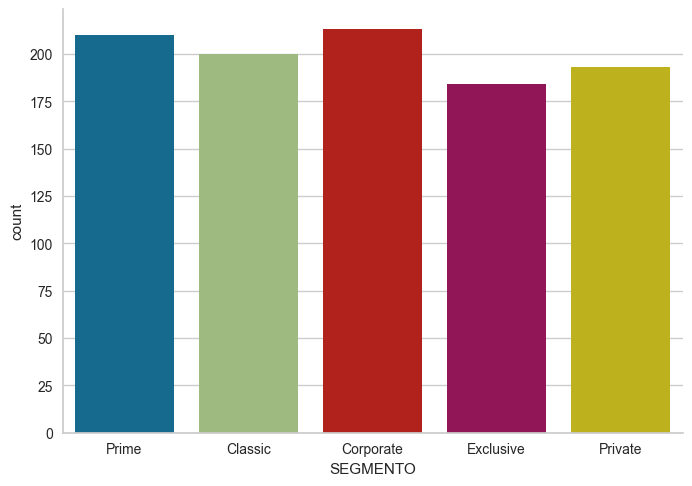

In [11]:
sns.countplot(data=df, x='SEGMENTO')

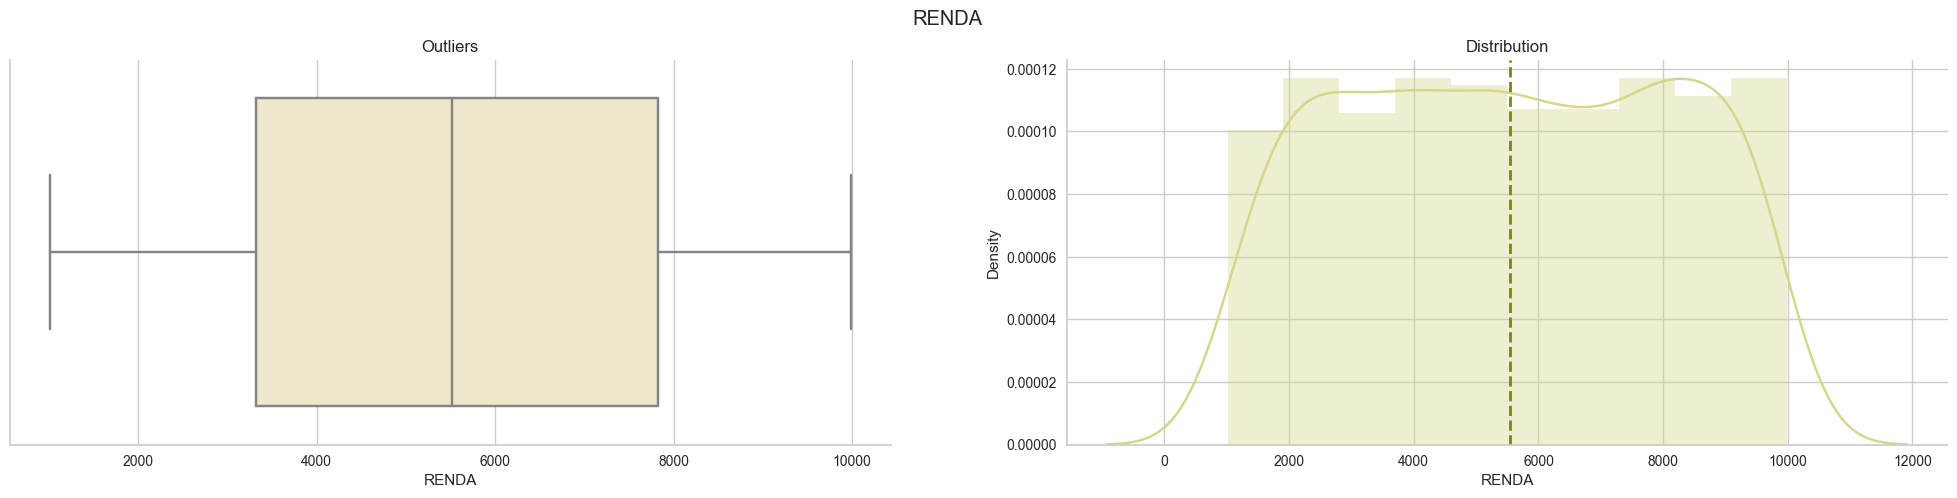

In [12]:
f, axes = plt.subplots(1, 2, figsize=(25,5))
f.suptitle('RENDA')

# Boxplot
sns.boxplot(data = df, x= 'RENDA', color=colors[2], ax=axes[0])
axes[0].set_title('Outliers')

# Distplot
sns.distplot(df['RENDA'], color=colors[3],ax=axes[1])
plt.axvline(x=df['RENDA'].mean(), color=colors[5], linestyle='--', linewidth=2)
axes[1].set_title('Distribution')

plt.show();

# #02 - Criando validadores

In [13]:

df['DIFF_CANCEL_VENDA'] = (df['DT_CANCELAMENTO'] - df['DT_VENDA']).dt.days

# Criação das colunas com observações 0 e 1 para as validações
df['CANCELAMENTO_ANTES_5_MESES'] = (df['DIFF_CANCEL_VENDA'] < 5*30).astype(int)
df['CANCELAMENTO_ENTRE_5_E_7_MESES'] = ((df['DIFF_CANCEL_VENDA'] >= 5*30) & (df['DIFF_CANCEL_VENDA'] <= 7*30)).astype(int)
df['RELACIONAMENTO_MAIOR_7_MESES'] = (df['DT_RELAC_INICIO'] <= (df['DT_VENDA'] - pd.DateOffset(months=7))).astype(int)


In [14]:
df.columns

Index(['ID_DOCUMENTO', 'ID_COTA', 'DT_CONTEM', 'CANAL_PREFERENCIAL',
       'PERFIL_FAGC', 'PROPENSAO_ABANDONO', 'VALOR_SALDO_MEDIO',
       'GRP_PERSONAS', 'RENTABILIDADE', 'IDHM', 'GRAU_CONHECIMENTO',
       'PERFIL_DIGITAL', 'RENDA', 'CPV', 'DT_NASCIMENTO', 'IDADE_CLIENTE',
       'RELACIONAMENTO_PRIORI', 'DT_RELAC_INICIO', 'SEXO', 'CPF', 'SEGMENTO',
       'PROCESSO', 'CIDADE', 'ESTADO', 'DT_VENDA', 'VL_TAXA', 'VL_SEGURO',
       'PZ_PARCELAS', 'N_ASSEMBLEIAS', 'VL_PARCELA', 'N_PC_PAGAS',
       'DS_FORMA_PAGAMENTO', 'NM_PONTO_VENDA', 'ST_CONTEMPLADO',
       'DT_CANCELAMENTO', 'DIFF_CANCEL_VENDA', 'CANCELAMENTO_ANTES_5_MESES',
       'CANCELAMENTO_ENTRE_5_E_7_MESES', 'RELACIONAMENTO_MAIOR_7_MESES'],
      dtype='object')

<Axes: xlabel='CANCELAMENTO_ANTES_5_MESES', ylabel='count'>

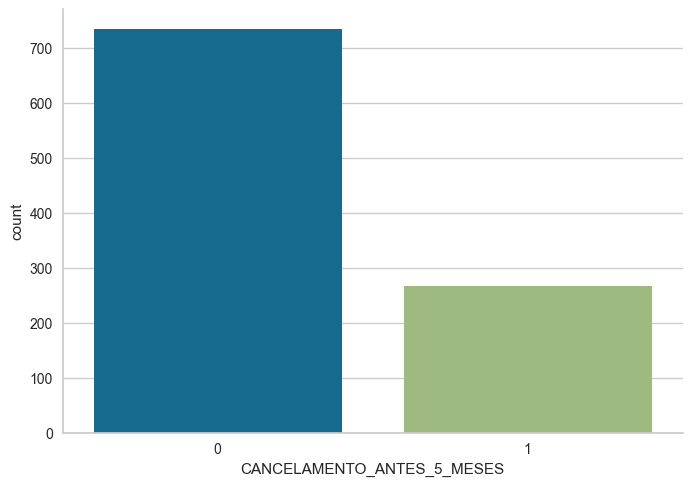

In [15]:
sns.countplot(data=df, x='CANCELAMENTO_ANTES_5_MESES')

In [16]:
#FUNÇÃO PRA FAZER A ÁNALISE ANTERIOR MAIS RAPIDA EM CADA COLUNA

def canc_5m_func(data, column, count = True):
    print (f'Quantidade de valores únicos: {data[column].nunique()}')
    print (f'\nQuais são os valores únicos: {data[column].unique()}')
    print (f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    #print (f'\nQuantidade por opção: {data[column].value.counts()}')
    print  (f'\nQuantidade por opção: {data[column].value_counts()}')


    if count == True:
        sns.countplot(data=data, x=column, hue='CANCELAMENTO_ANTES_5_MESES')
    else:
        sns.displot(data[column], kde= True)

Quantidade de valores únicos: 2

Quais são os valores únicos: ['Masculino' 'Feminino']

Quantidade de valores nulos: 0

Quantidade por opção: Masculino    523
Feminino     477
Name: SEXO, dtype: int64


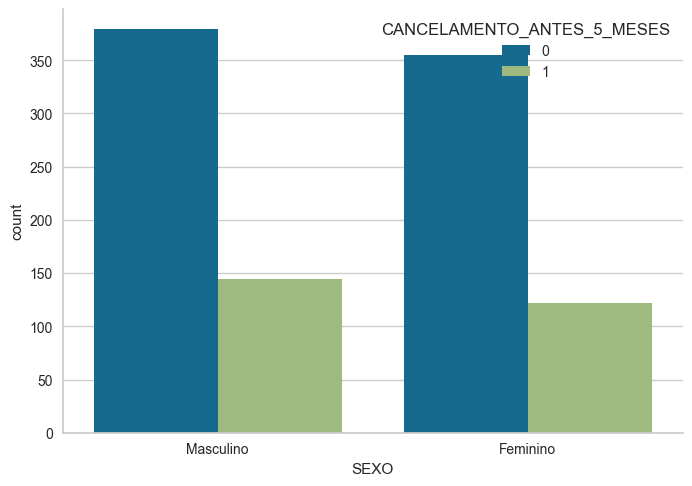

In [17]:
canc_5m_func(df, 'SEXO')

# #03 - Tratamento de dados

In [18]:
# Converte a coluna DT_NASCIMENTO para o formato de df e hora
df['DT_NASCIMENTO'] = pd.to_datetime(df['DT_NASCIMENTO'])

# Define os limites de anos de nascimento para cada geração
faixas_geracionais = {
    'Geração Perdida': (1900, 1924),
    'Geração Grandiosa': (1925, 1945),
    'Geração Silenciosa': (1946, 1964),
    'Baby Boomers': (1946, 1964),
    'Geração Interbellum': (1900, 1924),
    'Geração X': (1965, 1979),
    'Geração Y': (1980, 1994),
    'Geração Z': (1995, 2010),
    'Geração Alpha': (2011, 2025)
}

# Função para atribuir a etiqueta da faixa geracional com base no ano de nascimento
def atribuir_faixa_geracional(ano_nascimento):
    for faixa, (inicio, fim) in faixas_geracionais.items():
        if inicio <= ano_nascimento.year <= fim:
            return faixa
    return 'Desconhecida'

# Aplica a função para criar a coluna FAIXA_GERACIONAL
df['FAIXA_GERACIONAL'] = data['DT_NASCIMENTO'].apply(atribuir_faixa_geracional)


In [19]:
df.head().style.background_gradient()

,ID_DOCUMENTO,ID_COTA,DT_CONTEM,CANAL_PREFERENCIAL,PERFIL_FAGC,PROPENSAO_ABANDONO,VALOR_SALDO_MEDIO,GRP_PERSONAS,RENTABILIDADE,IDHM,GRAU_CONHECIMENTO,PERFIL_DIGITAL,RENDA,CPV,DT_NASCIMENTO,IDADE_CLIENTE,RELACIONAMENTO_PRIORI,DT_RELAC_INICIO,SEXO,CPF,SEGMENTO,PROCESSO,CIDADE,ESTADO,DT_VENDA,VL_TAXA,VL_SEGURO,PZ_PARCELAS,N_ASSEMBLEIAS,VL_PARCELA,N_PC_PAGAS,DS_FORMA_PAGAMENTO,NM_PONTO_VENDA,ST_CONTEMPLADO,DT_CANCELAMENTO,DIFF_CANCEL_VENDA,CANCELAMENTO_ANTES_5_MESES,CANCELAMENTO_ENTRE_5_E_7_MESES,RELACIONAMENTO_MAIOR_7_MESES,FAIXA_GERACIONAL
0,1,1001,2023-06-23,Correio,Sim,0.250566,9481.073246,Grupo A,7.358016,0.900613,Médio,Básico,1993.164666,Muito Alto,1954-12-29 00:00:00,69,Sim,2021-04-27,Masculino,32248400289,Prime,Sim,da Mata da Serra,AP,2023-08-03,143.043348,370.144304,17,2,195.252325,2,Débito Automático,Mobile,N,2023-09-29,57.000000,1,0,1,Geração Silenciosa
1,2,1002,2020-12-17,Correio,Sim,0.353149,7768.551039,Grupo B,1.924547,0.982635,Baixo,Básico,7780.716141,Alto,1989-02-27 00:00:00,80,Não,2017-11-28,Masculino,57361666396,Classic,Sim,Rocha Alegre,PA,2023-12-22,137.284514,210.482453,25,2,151.805855,14,Transferência Bancária,Internet Banking,S,nan,nan,0,0,1,Geração Y
2,3,1003,2023-10-11,Telefone,Sim,0.746007,5984.868155,Grupo C,9.105461,0.851639,Alto,Básico,9774.666170,Baixo,2000-03-23 00:00:00,50,Sim,2020-06-22,Masculino,76138993646,Corporate,Não,Lima,ES,2023-10-29,196.349278,265.159057,43,2,69.246607,8,Boleto,Agência,N,2024-03-28,151.000000,0,1,1,Geração Z
3,4,1004,2024-03-02,SMS,Não,0.532970,9519.233613,Grupo C,5.203811,0.750609,Alto,Intermediário,5637.398605,Baixo,1968-06-14 00:00:00,80,Sim,2015-07-17,Feminino,14166294352,Corporate,Não,Oliveira,ES,2023-08-04,52.852188,317.189842,16,5,51.214495,8,Transferência Bancária,Mobile,N,2023-08-07,3.000000,1,0,1,Geração X
4,5,1005,2023-09-16,Correio,Sim,0.281411,5323.282292,Grupo C,8.935675,0.930508,Baixo,Avançado,7210.521993,Muito Alto,1940-12-03 00:00:00,85,Sim,2015-10-21,Feminino,99554315030,Prime,Sim,da Rocha da Praia,AC,2024-02-10,177.684027,258.571360,36,3,366.659730,4,Transferência Bancária,Agência,N,2024-03-29,48.000000,1,0,1,Geração Grandiosa


In [20]:
df['FAIXA_GERACIONAL'].value_counts()

Geração Silenciosa    239
Geração Y             220
Geração X             211
Geração Grandiosa     170
Geração Z             160
Name: FAIXA_GERACIONAL, dtype: int64

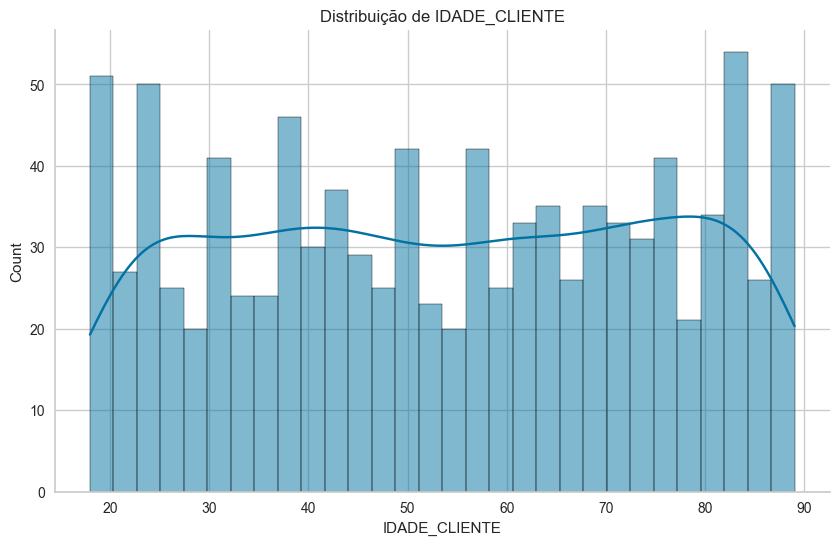

In [21]:
# Checando a distribuição da idade dos clientes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='IDADE_CLIENTE', bins=30, kde=True)
plt.title('Distribuição de IDADE_CLIENTE')
plt.show()

In [22]:
df['DURACAO_MESES'] = (df['DT_CANCELAMENTO'] - df['DT_VENDA']) // np.timedelta64(1, 'M')

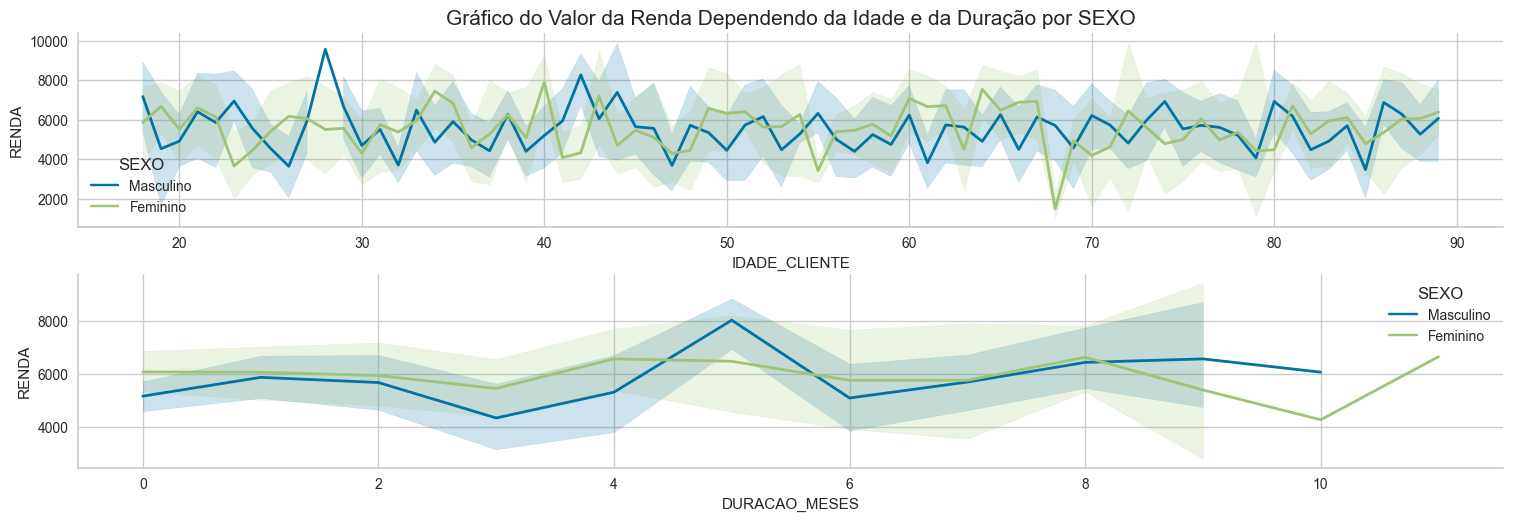

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(15, 5))
plt.tight_layout()  # Não é necessário passar argumentos para tight_layout()

sns.lineplot(data=df, x='IDADE_CLIENTE', y='RENDA', hue='SEXO', lw=2, ax=ax[0]).set_title("Gráfico do Valor da Renda Dependendo da Idade e da Duração por SEXO", fontsize=15)
sns.lineplot(data=df, x='DURACAO_MESES', y='RENDA', hue='SEXO', lw=2, ax=ax[1])

plt.show()

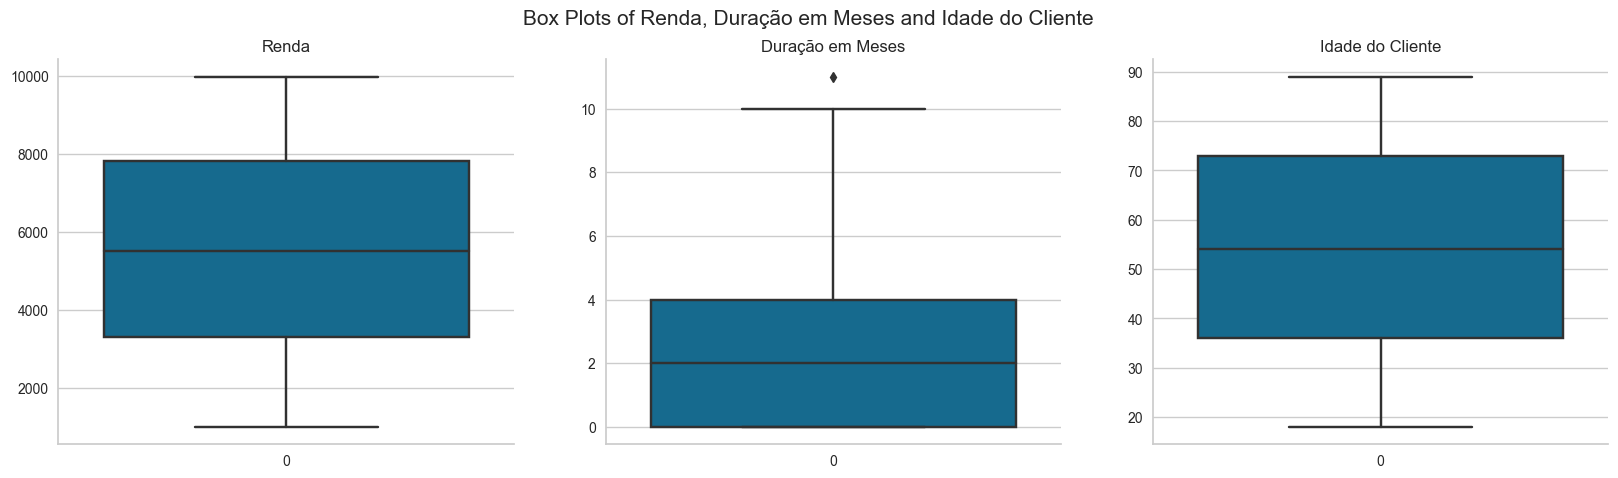

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o tamanho da figura e os subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Título da figura
plt.suptitle('Box Plots of Renda, Duração em Meses and Idade do Cliente', fontsize=15)

# Box plot para Renda
sns.boxplot(df['RENDA'], ax=axes[0])
axes[0].set_title('Renda')

# Box plot para Duração em Meses
sns.boxplot(df['DURACAO_MESES'], ax=axes[1])
axes[1].set_title('Duração em Meses')

# Box plot para Idade do Cliente
sns.boxplot(df['IDADE_CLIENTE'], ax=axes[2])
axes[2].set_title('Idade do Cliente')

# Exibir os gráficos
plt.show()

In [25]:
df.columns

Index(['ID_DOCUMENTO', 'ID_COTA', 'DT_CONTEM', 'CANAL_PREFERENCIAL',
       'PERFIL_FAGC', 'PROPENSAO_ABANDONO', 'VALOR_SALDO_MEDIO',
       'GRP_PERSONAS', 'RENTABILIDADE', 'IDHM', 'GRAU_CONHECIMENTO',
       'PERFIL_DIGITAL', 'RENDA', 'CPV', 'DT_NASCIMENTO', 'IDADE_CLIENTE',
       'RELACIONAMENTO_PRIORI', 'DT_RELAC_INICIO', 'SEXO', 'CPF', 'SEGMENTO',
       'PROCESSO', 'CIDADE', 'ESTADO', 'DT_VENDA', 'VL_TAXA', 'VL_SEGURO',
       'PZ_PARCELAS', 'N_ASSEMBLEIAS', 'VL_PARCELA', 'N_PC_PAGAS',
       'DS_FORMA_PAGAMENTO', 'NM_PONTO_VENDA', 'ST_CONTEMPLADO',
       'DT_CANCELAMENTO', 'DIFF_CANCEL_VENDA', 'CANCELAMENTO_ANTES_5_MESES',
       'CANCELAMENTO_ENTRE_5_E_7_MESES', 'RELACIONAMENTO_MAIOR_7_MESES',
       'FAIXA_GERACIONAL', 'DURACAO_MESES'],
      dtype='object')

In [26]:
df['DT_VENDA'] = pd.to_datetime(df['DT_VENDA'])
df['DT_CONTEM'] = pd.to_datetime(df['DT_CONTEM'])
df['DT_RELAC_INICIO'] = pd.to_datetime(df['DT_RELAC_INICIO'])
df['DT_CANCELAMENTO'] = pd.to_datetime(df['DT_CANCELAMENTO'])

In [27]:
# Lista com os nomes das colunas de data que você deseja excluir
colunas_data = ['DT_CANCELAMENTO', 'DT_VENDA', 'DT_CONTEM', 'DT_RELAC_INICIO', "DT_NASCIMENTO", "DIFF_CANCEL_VENDA","DURACAO_MESES" ]  # Substitua pelos nomes das suas colunas de data
# Use o método drop() para excluir as colunas de data
df = df.drop(colunas_data, axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_DOCUMENTO                    1000 non-null   int64  
 1   ID_COTA                         1000 non-null   int64  
 2   CANAL_PREFERENCIAL              1000 non-null   object 
 3   PERFIL_FAGC                     1000 non-null   object 
 4   PROPENSAO_ABANDONO              1000 non-null   float64
 5   VALOR_SALDO_MEDIO               1000 non-null   float64
 6   GRP_PERSONAS                    1000 non-null   object 
 7   RENTABILIDADE                   1000 non-null   float64
 8   IDHM                            1000 non-null   float64
 9   GRAU_CONHECIMENTO               1000 non-null   object 
 10  PERFIL_DIGITAL                  1000 non-null   object 
 11  RENDA                           1000 non-null   float64
 12  CPV                             100

# #05 - Pré-processamento dos dados para realizar operações de agrupamento

### Get Dummies

In [29]:
# Pegando as variaveis categoricas

s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print('Variaveis categoricas desse dataset:', object_cols)

Variaveis categoricas desse dataset: ['CANAL_PREFERENCIAL', 'PERFIL_FAGC', 'GRP_PERSONAS', 'GRAU_CONHECIMENTO', 'PERFIL_DIGITAL', 'CPV', 'RELACIONAMENTO_PRIORI', 'SEXO', 'SEGMENTO', 'PROCESSO', 'CIDADE', 'ESTADO', 'DS_FORMA_PAGAMENTO', 'NM_PONTO_VENDA', 'ST_CONTEMPLADO', 'FAIXA_GERACIONAL']


In [30]:
# Transformando todas as variaveis categoricas em Númericas
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("Todas as features são númericas agora")

Todas as features são númericas agora


In [31]:
df.dtypes

ID_DOCUMENTO                        int64
ID_COTA                             int64
CANAL_PREFERENCIAL                  int32
PERFIL_FAGC                         int32
PROPENSAO_ABANDONO                float64
VALOR_SALDO_MEDIO                 float64
GRP_PERSONAS                        int32
RENTABILIDADE                     float64
IDHM                              float64
GRAU_CONHECIMENTO                   int32
PERFIL_DIGITAL                      int32
RENDA                             float64
CPV                                 int32
IDADE_CLIENTE                       int32
RELACIONAMENTO_PRIORI               int32
SEXO                                int32
CPF                                 int64
SEGMENTO                            int32
PROCESSO                            int32
CIDADE                              int32
ESTADO                              int32
VL_TAXA                           float64
VL_SEGURO                         float64
PZ_PARCELAS                       

# PCA

In [32]:
# lets build elbow method to find the optimal number of clusters
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1000.0,2.258301e-06,2.941594e+10,-4.944746e+10,-2.602742e+10,5.840479e+08,2.496232e+10,5.050550e+10
col2,1000.0,1.418812e-13,2.653910e+03,-5.762802e+03,-2.080930e+03,-1.372001e+02,2.040513e+03,5.979144e+03
col3,1000.0,2.255547e-13,2.538931e+03,-5.831141e+03,-1.884430e+03,-2.713750e+01,1.869690e+03,5.906711e+03


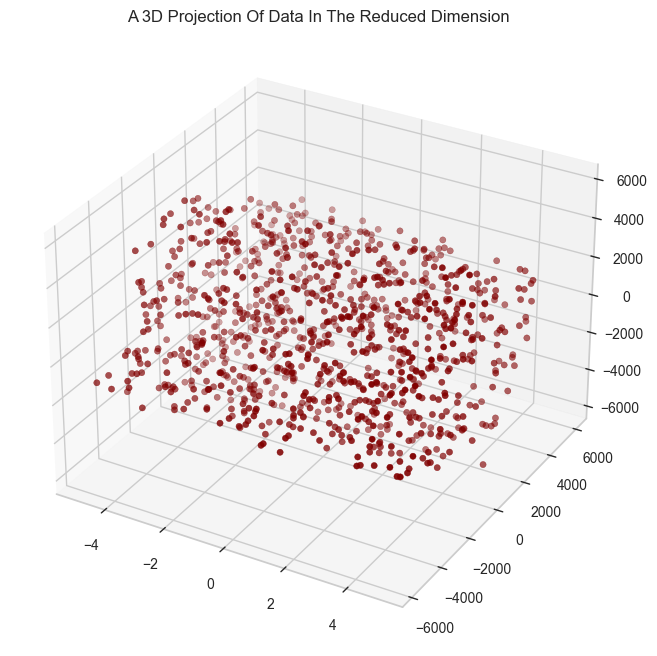

In [33]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [34]:
# import plotly.graph_objects as go
# import numpy as np

# x =PCA_ds["col1"]
# y =PCA_ds["col2"]
# z =PCA_ds["col3"]

# fig = go.Figure(data=[go.Scatter3d(
#     x=x,
#     y=y,
#     z=z,
#     mode='markers',
#     marker=dict(
#         size=6,
#         color=z,                
#         colorscale=colors,   
#         opacity=0.8
#     )
# )])

# fig.show()

# Clusterização

Elbow Method to determine the number of clusters to be formed:


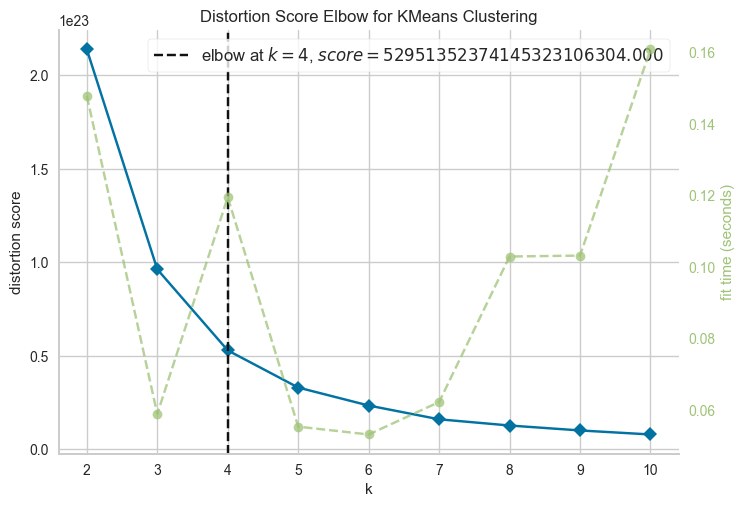

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

Agglomerative Clusterização

In [36]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df)
PCA_ds["AggClusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["AggClusters"]= yhat_AC

Calculando Silhouttte Score

In [37]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, yhat_AC)

In [38]:
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5517644600143867


Plotando os clusters nas 3 Dimensões

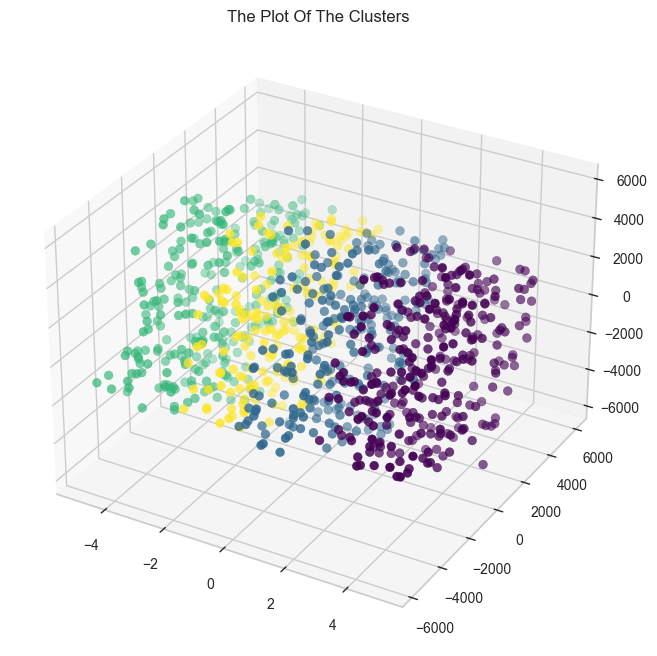

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Certifique-se de importar o módulo cmap
import matplotlib.cm as cm

# Se 'PCA_ds["AggClusters"]' for um array de números inteiros representando os rótulos de cluster
cmap = cm.get_cmap('viridis', len(set(PCA_ds["AggClusters"])))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["AggClusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

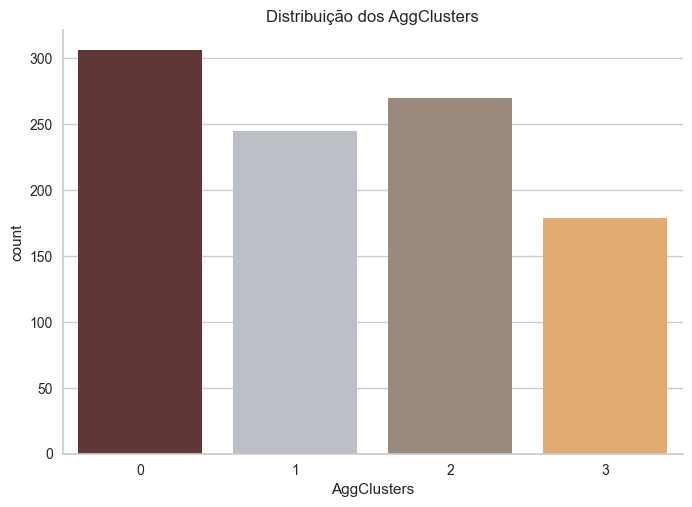

In [40]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["AggClusters"], palette= pal)
pl.set_title("Distribuição dos AggClusters")
plt.show()

K- Means

In [41]:
from sklearn.cluster import *
kmeans = KMeans(n_clusters=4)
yhat_kmeans = kmeans.fit_predict(PCA_ds)
PCA_ds["KmeanClusters"] = yhat_kmeans
df["KmeanClusters"]= yhat_kmeans

In [42]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(df, yhat_kmeans)

print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.5746137858800434


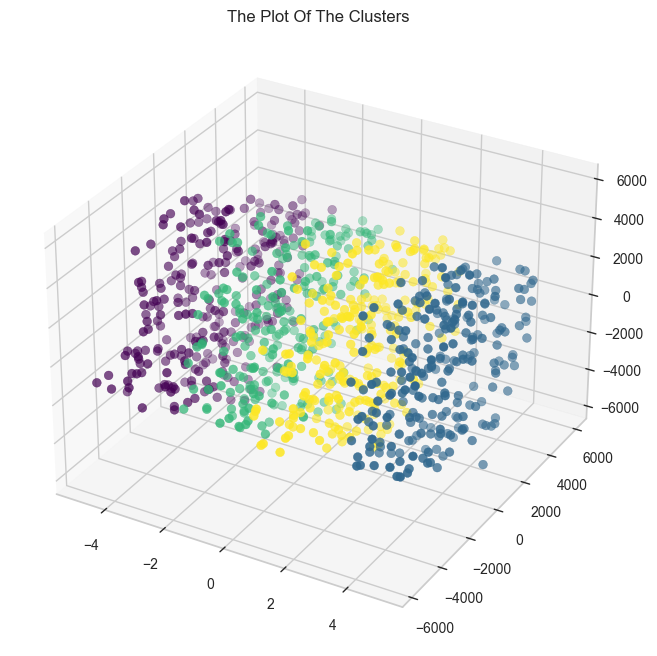

In [43]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["KmeanClusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

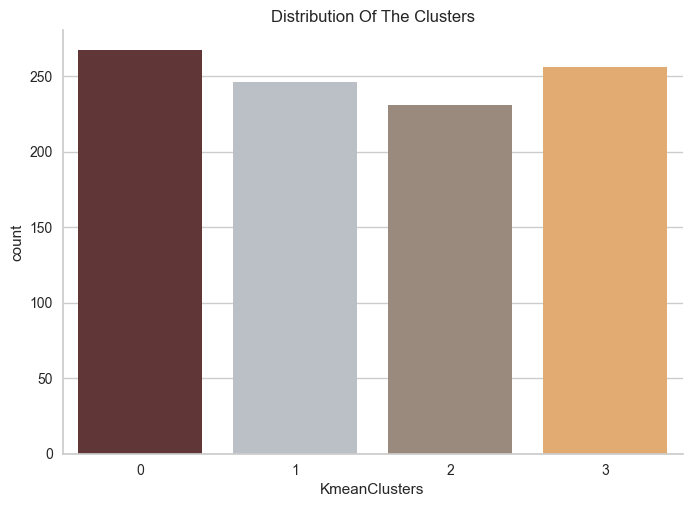

In [44]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["KmeanClusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

DBSCAN

In [45]:
from sklearn.cluster import *
dbscan = DBSCAN(eps=1)
yhat_dbscan = dbscan.fit_predict(PCA_ds)
PCA_ds["DBSCANClusters"] = yhat_dbscan
df["DBSCANClusters"]= yhat_dbscan

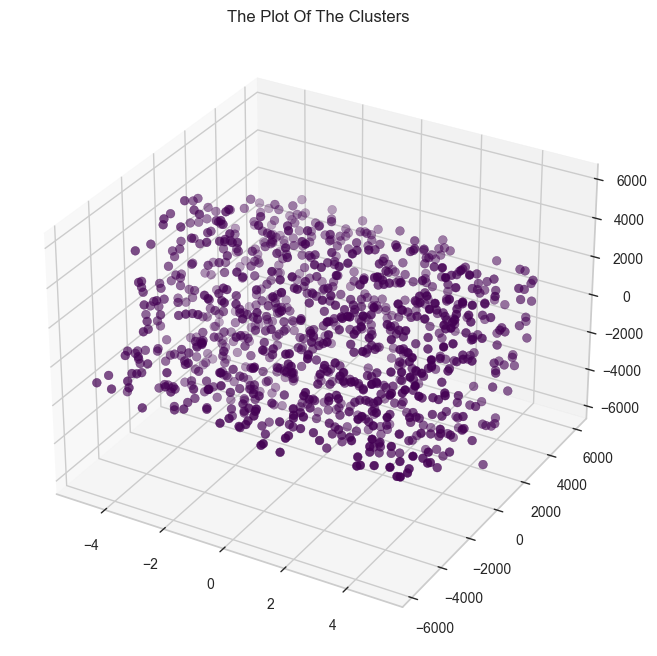

In [46]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["DBSCANClusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

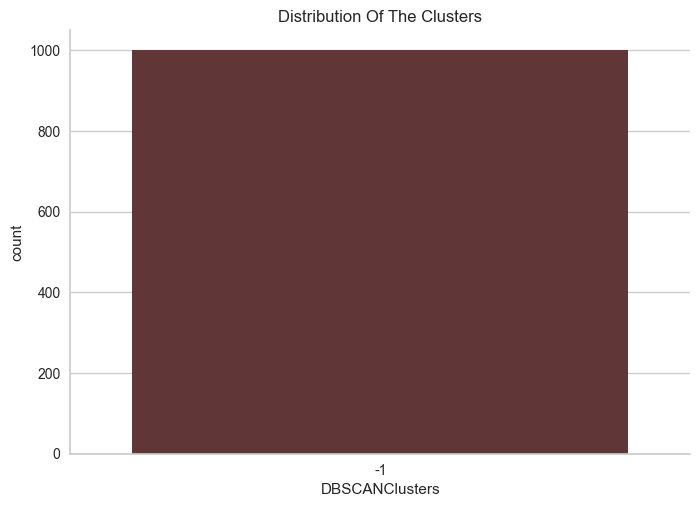

In [47]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["DBSCANClusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [48]:
df.head().style.background_gradient()

,ID_DOCUMENTO,ID_COTA,CANAL_PREFERENCIAL,PERFIL_FAGC,PROPENSAO_ABANDONO,VALOR_SALDO_MEDIO,GRP_PERSONAS,RENTABILIDADE,IDHM,GRAU_CONHECIMENTO,PERFIL_DIGITAL,RENDA,CPV,IDADE_CLIENTE,RELACIONAMENTO_PRIORI,SEXO,CPF,SEGMENTO,PROCESSO,CIDADE,ESTADO,VL_TAXA,VL_SEGURO,PZ_PARCELAS,N_ASSEMBLEIAS,VL_PARCELA,N_PC_PAGAS,DS_FORMA_PAGAMENTO,NM_PONTO_VENDA,ST_CONTEMPLADO,CANCELAMENTO_ANTES_5_MESES,CANCELAMENTO_ENTRE_5_E_7_MESES,RELACIONAMENTO_MAIOR_7_MESES,FAIXA_GERACIONAL,AggClusters,KmeanClusters,DBSCANClusters
0,1,1001,0,1,0.250566,9481.073246,0,7.358016,0.900613,2,1,1993.164666,2,69,1,1,32248400289,3,1,466,3,143.043348,370.144304,17,2,195.252325,2,1,3,1,1,0,1,1,3,2,-1
1,2,1002,0,1,0.353149,7768.551039,1,1.924547,0.982635,1,1,7780.716141,0,80,0,1,57361666396,0,1,352,13,137.284514,210.482453,25,2,151.805855,14,2,2,2,0,0,1,3,1,3,-1
2,3,1003,3,1,0.746007,5984.868155,2,9.105461,0.851639,0,1,9774.666170,1,50,1,1,76138993646,1,0,203,7,196.349278,265.159057,43,2,69.246607,8,0,0,1,0,1,1,4,0,1,-1
3,4,1004,2,0,0.532970,9519.233613,2,5.203811,0.750609,0,2,5637.398605,1,80,1,0,14166294352,1,0,289,7,52.852188,317.189842,16,5,51.214495,8,2,3,1,1,0,1,2,2,0,-1
4,5,1005,0,1,0.281411,5323.282292,2,8.935675,0.930508,1,0,7210.521993,2,85,1,0,99554315030,3,1,487,0,177.684027,258.571360,36,3,366.659730,4,2,0,1,1,0,1,0,0,1,-1


In [49]:
df.columns

Index(['ID_DOCUMENTO', 'ID_COTA', 'CANAL_PREFERENCIAL', 'PERFIL_FAGC',
       'PROPENSAO_ABANDONO', 'VALOR_SALDO_MEDIO', 'GRP_PERSONAS',
       'RENTABILIDADE', 'IDHM', 'GRAU_CONHECIMENTO', 'PERFIL_DIGITAL', 'RENDA',
       'CPV', 'IDADE_CLIENTE', 'RELACIONAMENTO_PRIORI', 'SEXO', 'CPF',
       'SEGMENTO', 'PROCESSO', 'CIDADE', 'ESTADO', 'VL_TAXA', 'VL_SEGURO',
       'PZ_PARCELAS', 'N_ASSEMBLEIAS', 'VL_PARCELA', 'N_PC_PAGAS',
       'DS_FORMA_PAGAMENTO', 'NM_PONTO_VENDA', 'ST_CONTEMPLADO',
       'CANCELAMENTO_ANTES_5_MESES', 'CANCELAMENTO_ENTRE_5_E_7_MESES',
       'RELACIONAMENTO_MAIOR_7_MESES', 'FAIXA_GERACIONAL', 'AggClusters',
       'KmeanClusters', 'DBSCANClusters'],
      dtype='object')

# ANALISE

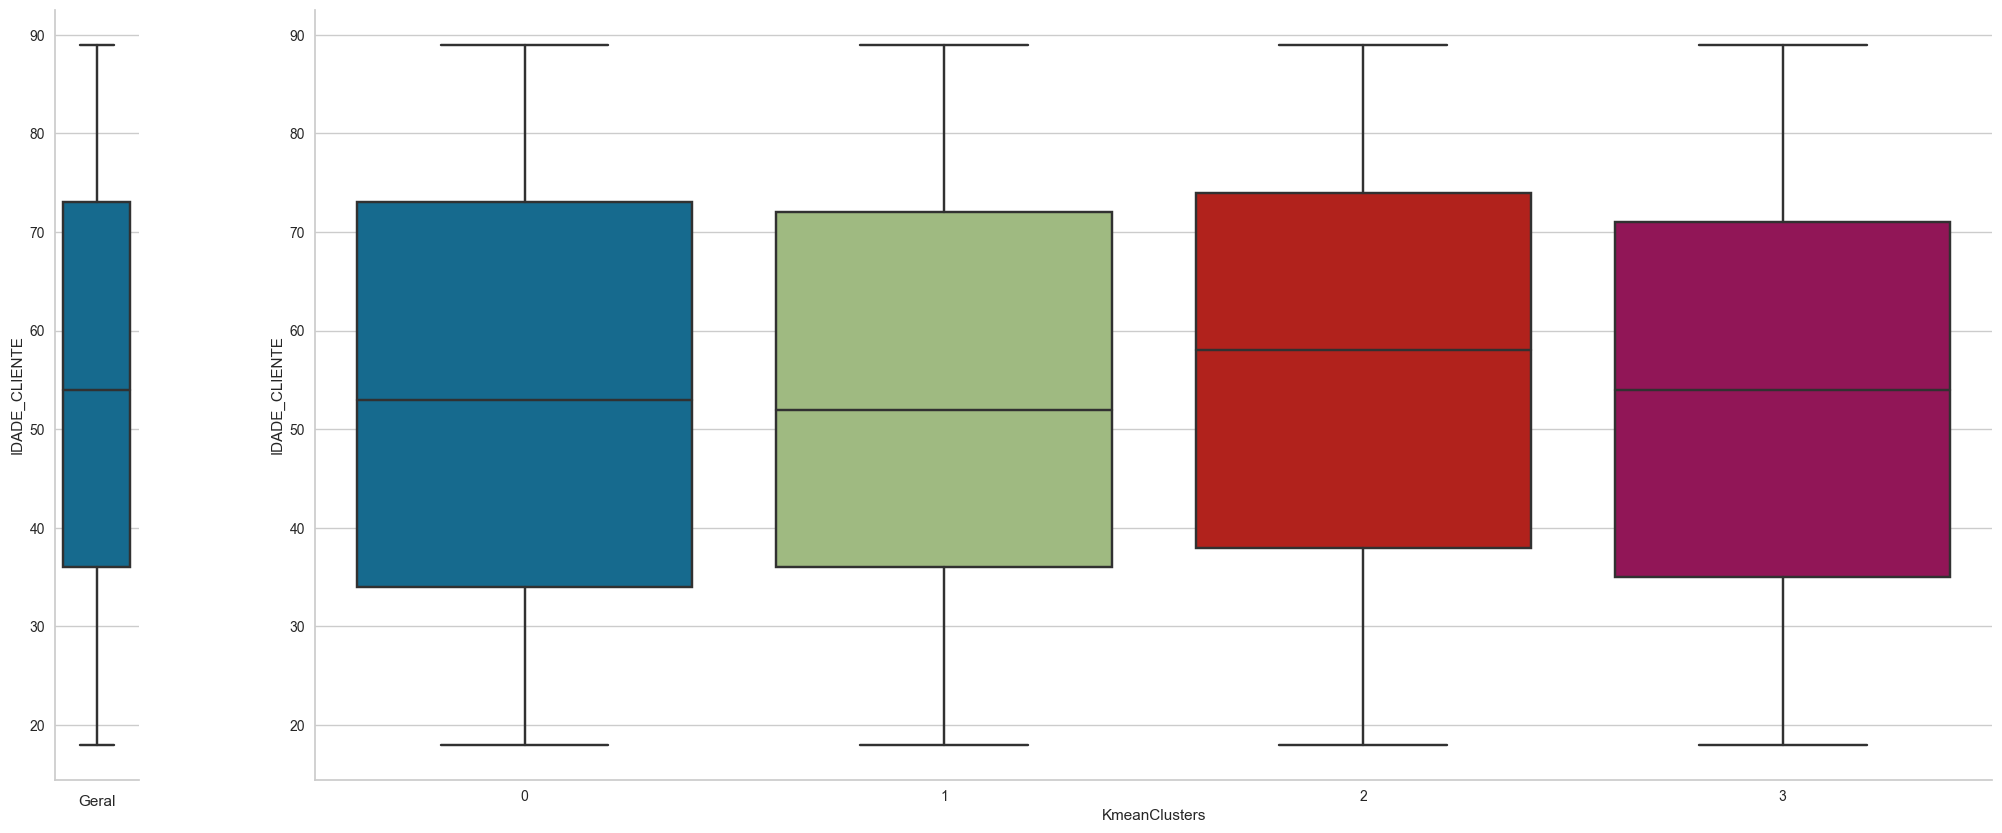

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(25, 10), gridspec_kw={'width_ratios': [1, 20]})
sns.boxplot(y="IDADE_CLIENTE", data=df, ax=ax[0]).set(xlabel="Geral")
sns.boxplot(x="KmeanClusters", y="IDADE_CLIENTE", data=df, ax=ax[1]).set(xlabel="KmeanClusters")
plt.show()


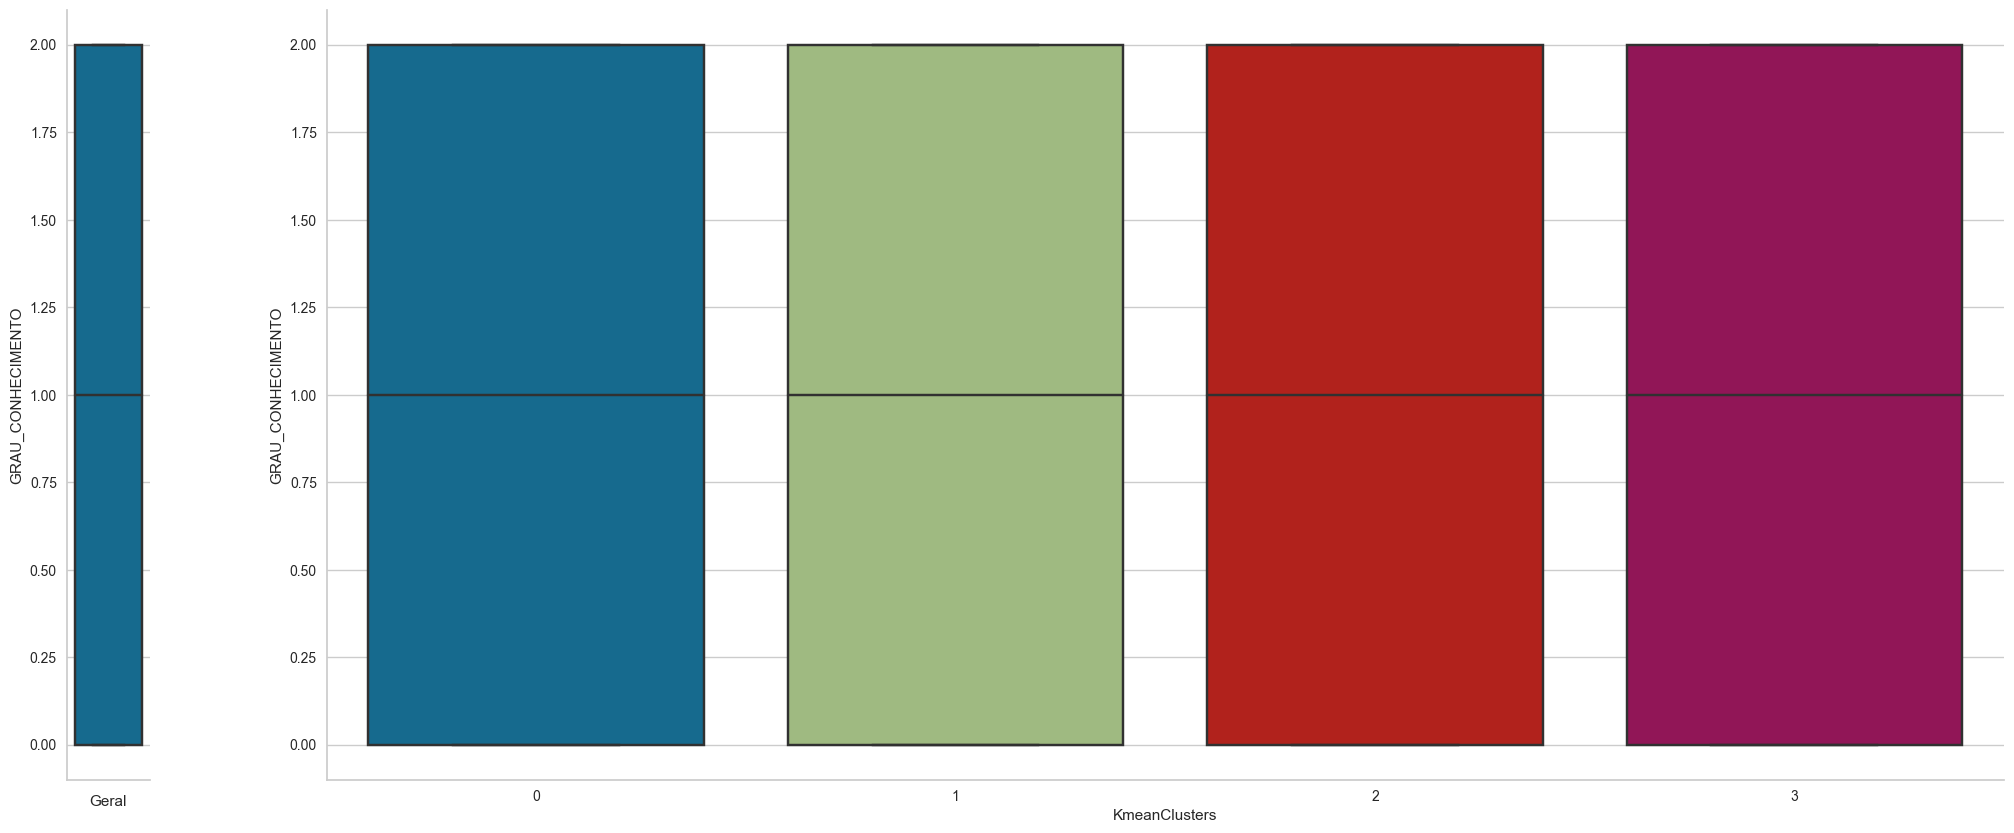

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(25, 10), gridspec_kw={'width_ratios': [1, 20]})
sns.boxplot(y="GRAU_CONHECIMENTO", data=df, ax=ax[0]).set(xlabel="Geral")
sns.boxplot(x="KmeanClusters", y="GRAU_CONHECIMENTO", data=df, ax=ax[1]).set(xlabel="KmeanClusters")
plt.show()